In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
import os
import numpy as np
plt.figure(figsize=(14, 5))
#librosa.display.waveplot(x, sr=sr)

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

In [19]:
directory1="/home/vibhhu/Downloads/Analytics/graph/"
directory2="/home/vibhhu/Downloads/Analytics/graphc/"

Taking a song of each type.

In [45]:
samples1, sample_rate1 = librosa.load(str(directory1)+"rock.00001.au")

In [29]:
samplesc1, sample_ratec1 = librosa.load(str(directory2)+"classical.00001.au")

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal.

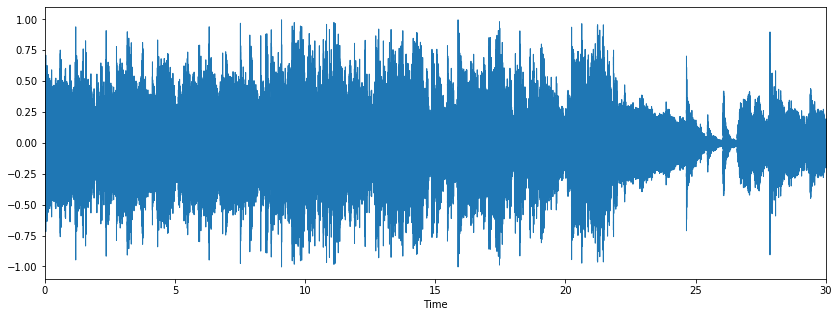

In [39]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples1, sr=sample_rate1)
#Rock

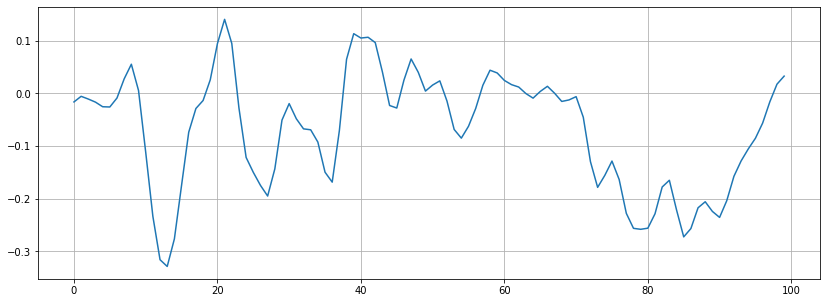

In [30]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(samples1[n0:n1])
plt.grid()
#Rock

In [54]:
zero_crossings = librosa.zero_crossings(samples1, pad=False)
print(sum(zero_crossings))

36426


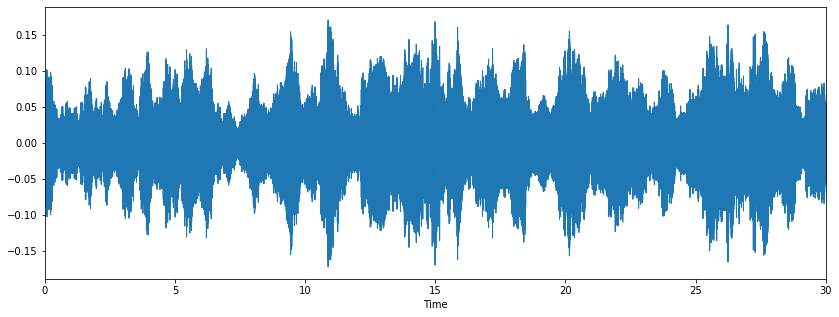

In [32]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samplesc1, sr=sample_ratec1)
#Classical

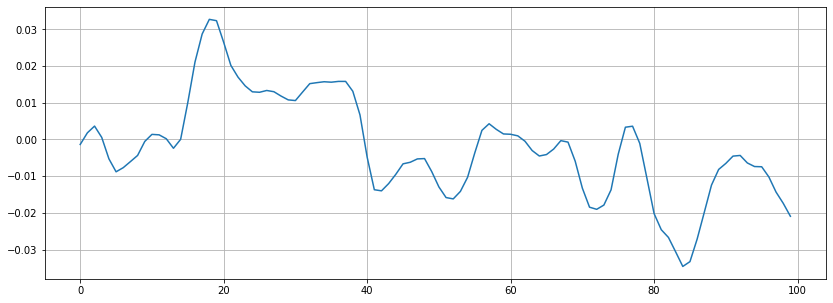

In [33]:
#Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(samplesc1[n0:n1])
plt.grid()
#Classical

In [53]:
zero_crossings = librosa.zero_crossings(samplesc1, pad=False)
print(sum(zero_crossings))

58180


On picturing the two waveforms side-by side, we see that the signal for rock music seems more packed toward a single amplitude(except towards the end) while the classical wave form shows variations in ampltitude.
Number of zero-crossings are more for classical music as can be seen by the numerically obtained result
Rock Music:36426
Classical Music:58180

MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale, and is thus useful in categorizing sound. It concisely describes the overall shape of a spectral envelope.
However, calculating the mfccs involves an involved procedure which includes linear cosine transform of a log power spectrum.
Therefore, interpretability directly from the diagram is difficult.
Nevertheless, we do see a difference in the two figures.

(20, 1293)


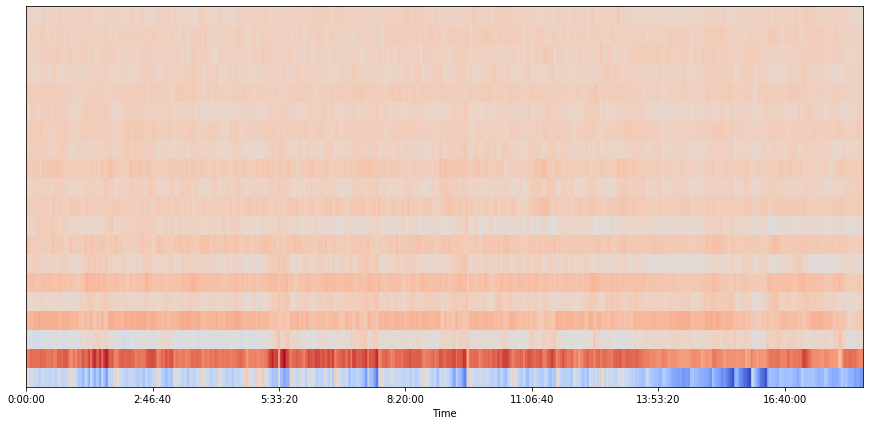

In [40]:
mfccs = librosa.feature.mfcc(samples1, sr=sample_rate1)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
#Rock

(20, 1293)


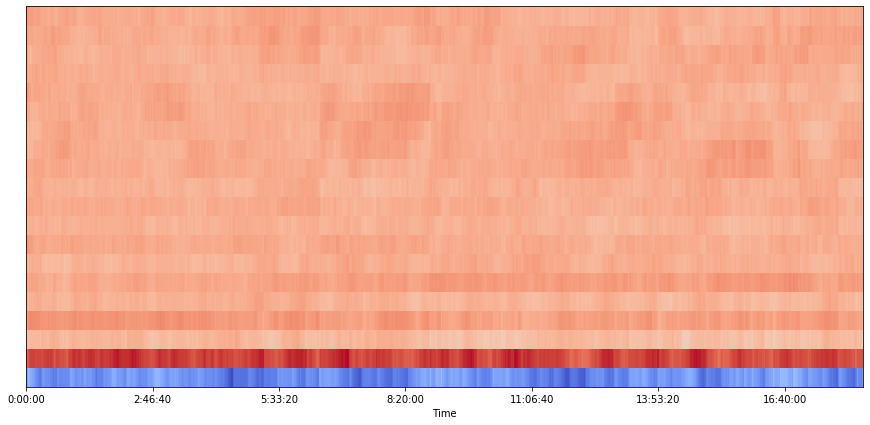

In [43]:
mfccs = librosa.feature.mfcc(samplesc1, sr=sample_ratec1)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
#Classical

The plot is darker in shade for classical music than for rock music.

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the "center of mass" for a sound is located. This is like a weighted mean:

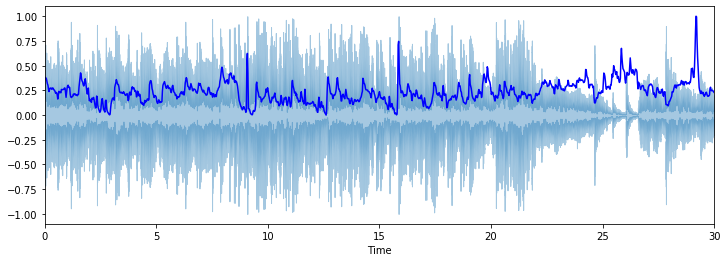

In [47]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(samples1, sr=sample_rate1)[0]
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(samples1, axis=0):
    return sklearn.preprocessing.minmax_scale(samples1, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(samples1, sr=sample_rate1, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#Rock

The graph shows the variation of spectral centroid on an absolute scale as a continuous function of time. The wave form at that time is also plotted in a lighter shade alongside.
The spectral centroid appears fairly centred at the start and shoots up only occassionally throughout the playtime.

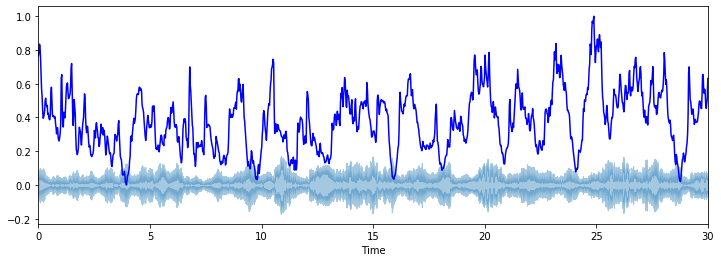

In [48]:
spectral_centroids = librosa.feature.spectral_centroid(samplesc1, sr=sample_ratec1)[0]
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(samplesc1, axis=0):
    return sklearn.preprocessing.minmax_scale(samplesc1, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(samplesc1, sr=sample_ratec1, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#Classical

In case of our classical music sample, a greater variation in spectral centroid is seen with Max-Min almost 1.0 on a relative scale which is greater than the maximum variation in classical music. Furthermore, the change is more frequent.

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 kHz vs 10 kHz, but one can also see how energy levels vary over time.
A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

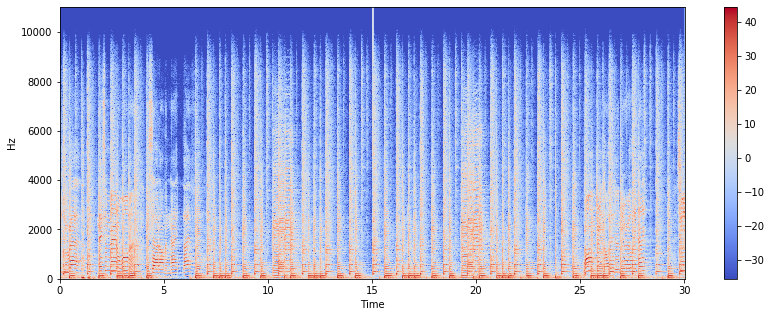

In [57]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate1, x_axis='time', y_axis='hz')
plt.colorbar()
#Rock

In a way, the spectrogram lets me know the energy carried by a wave at a particular frequency. This is related partly to the total energy/RMS, which is a feature I have use.

The below plot is a logarithmic plot(along y) of the above plot so as to make it clearer.

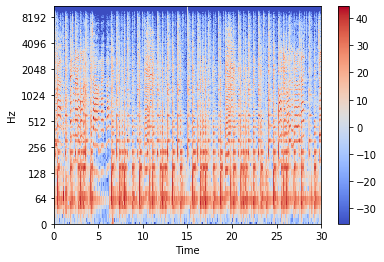

In [50]:
librosa.display.specshow(Xdb, sr=sample_rate1, x_axis='time', y_axis='log')
plt.colorbar()
#Rock

Decibel Plot

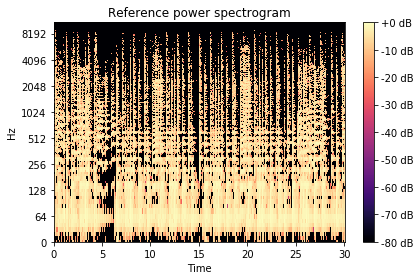

In [58]:
# Size of the FFT, which will also be used as the window length
n_fft=2048

# Step or stride between windows. If the step is smaller than the window lenght, the windows will overlap
hop_length=512
spectrogram_librosa_db = librosa.power_to_db(Xdb, ref=np.max)
librosa.display.specshow(spectrogram_librosa_db, sr=sample_rate1, y_axis='log', x_axis='time', hop_length=hop_length)
plt.title('Reference power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

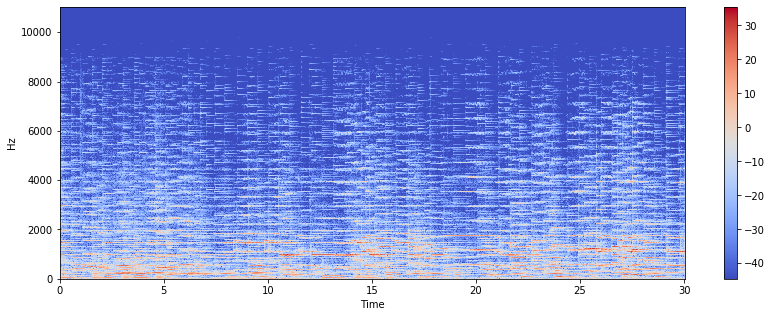

In [59]:
X = librosa.stft(samplesc1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_ratec1, x_axis='time', y_axis='hz')
plt.colorbar()
#Classical

The below plot is a logarithmic plot(along y) of the above plot so as to make it clearer.

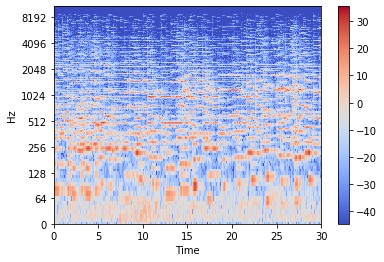

In [52]:
librosa.display.specshow(Xdb, sr=sample_ratec1, x_axis='time', y_axis='log')
plt.colorbar()
#Classical

Decibel Plot

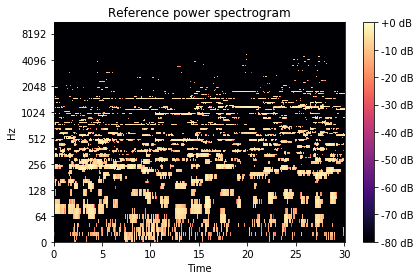

In [60]:
# Size of the FFT, which will also be used as the window length
n_fft=2048

# Step or stride between windows. If the step is smaller than the window lenght, the windows will overlap
hop_length=512
spectrogram_librosa_db = librosa.power_to_db(Xdb, ref=np.max)
librosa.display.specshow(spectrogram_librosa_db, sr=sample_rate1, y_axis='log', x_axis='time', hop_length=hop_length)
plt.title('Reference power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

The logarithmic plots for both the songs show differences.
Greater decibel values are seen for a larger range of frequencies throughout the song length for rock music in contrast to classical music. 
Therefore, one can expect rock music to have greater rms energy.

VIBHHU SHARMA
vibhhusharma2012@gmail.com